## Подключаем все наши библиотеки и проверяем что они запускаются

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score

## Признаки:

* season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
* yr: 0 - 2011, 1 - 2012
* mnth: месяц от 1 до 12
* holiday: 0 - нет праздника, 1 - есть праздник
* weekday: от 0 до 6
* workingday: 0 - нерабочий день, 1 - рабочий день
* weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* temp: температура в Цельсиях
* atemp: температура по ощущениям в Цельсиях
* hum: влажность
* windspeed(mph): скорость ветра в милях в час
* windspeed(ms): скорость ветра в метрах в секунду
* cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

## Задания

### Загрузите датасет и проведите анализ данных

#### Выведите первые 5 строк

In [32]:
data = pd.read_csv("bikes_rent.csv")
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


#### Выведите информацию о наборе

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


#### Размер набора (shape)

In [5]:
data.shape

(731, 13)

#### Посмотрите есть ли пропуски и дубликаты

In [6]:
data.isnull().sum()

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

In [7]:
data.duplicated().sum()

0

#### Посмотрите есть ли выбросы

In [24]:
data_number = data.select_dtypes(include=[np.number])
print(data_number.columns.values)
data_str = data.select_dtypes(exclude=[np.number])
print(data_str.columns.values)

['season' 'yr' 'mnth' 'holiday' 'weekday' 'workingday' 'weathersit' 'temp'
 'atemp' 'hum' 'windspeed(mph)' 'windspeed(ms)' 'cnt']
[]


In [9]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

season - 0%
yr - 0%
mnth - 0%
holiday - 0%
weekday - 0%
workingday - 0%
weathersit - 0%
temp - 0%
atemp - 0%
hum - 0%
windspeed(mph) - 0%
windspeed(ms) - 0%
cnt - 0%


#### Постройте графики для анализа набора данных: в какие дни (праздничные или нет, рабочие дни или нет) аренда больше, в какой год и какие месяца как проходит аренда, при какой погоде больше арендуют велосипедов

Text(0, 0.5, 'Количество велосипедов')

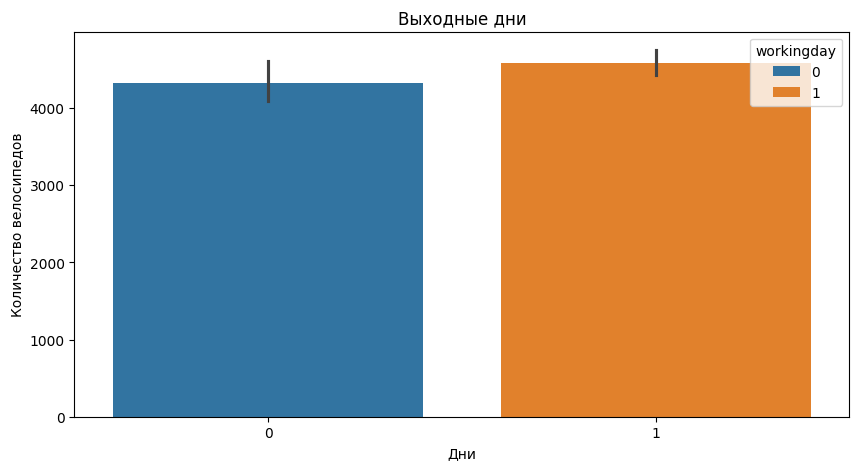

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x='workingday', y='cnt', hue='workingday',  data=data_number)
plt.title('Выходные дни')
plt.xlabel('Дни')
plt.ylabel('Количество велосипедов')

Text(0, 0.5, 'Количество велосипедов')

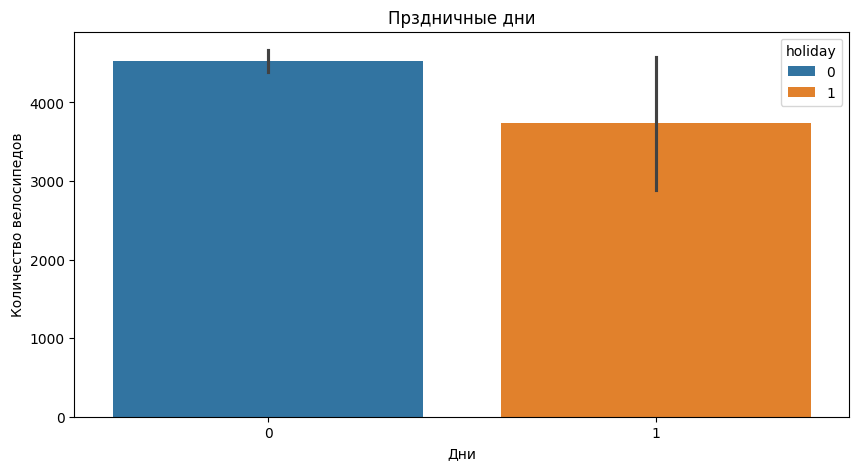

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x='holiday', y='cnt', hue='holiday',  data=data_number)
plt.title('Прздничные дни')
plt.xlabel('Дни')
plt.ylabel('Количество велосипедов')

Text(0, 0.5, 'Количество велосипедов')

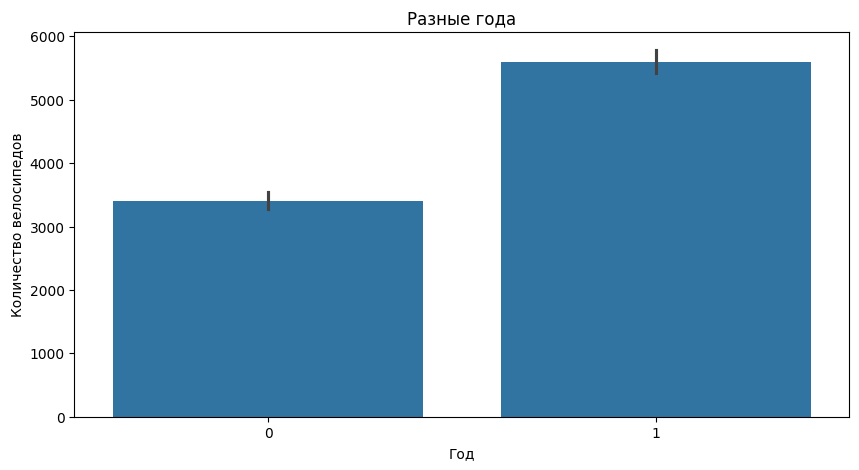

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x='yr', y='cnt', data=data_number)
plt.title('Разные года')
plt.xlabel('Год')
plt.ylabel('Количество велосипедов')

Text(0, 0.5, 'Количество велосипедов')

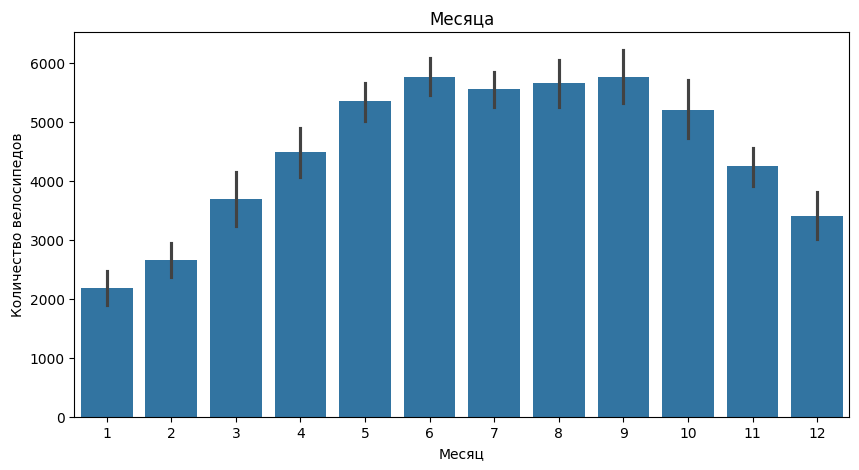

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(x='mnth', y='cnt', data=data_number)
plt.title('Месяца')
plt.xlabel('Месяц')
plt.ylabel('Количество велосипедов')

Text(0, 0.5, 'Количество велосипедов')

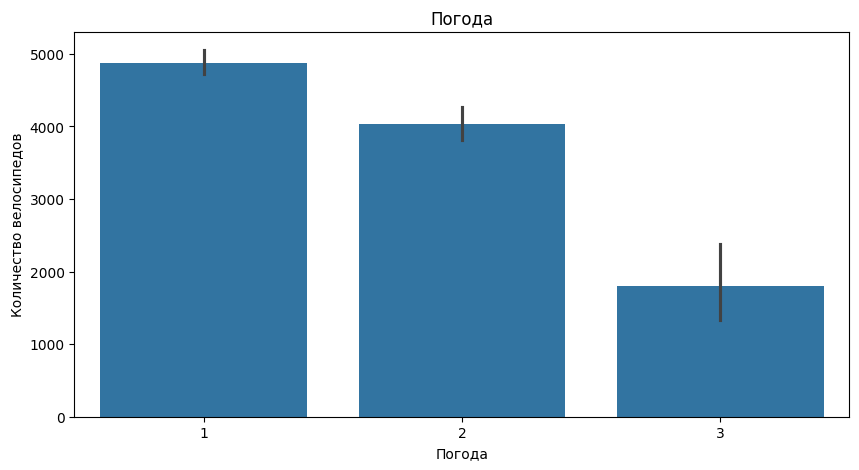

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weathersit', y='cnt', data=data_number)
plt.title('Погода')
plt.xlabel('Погода')
plt.ylabel('Количество велосипедов')

#### Постройте матрицу корреляции, сделайте по ней выводы

<Axes: >

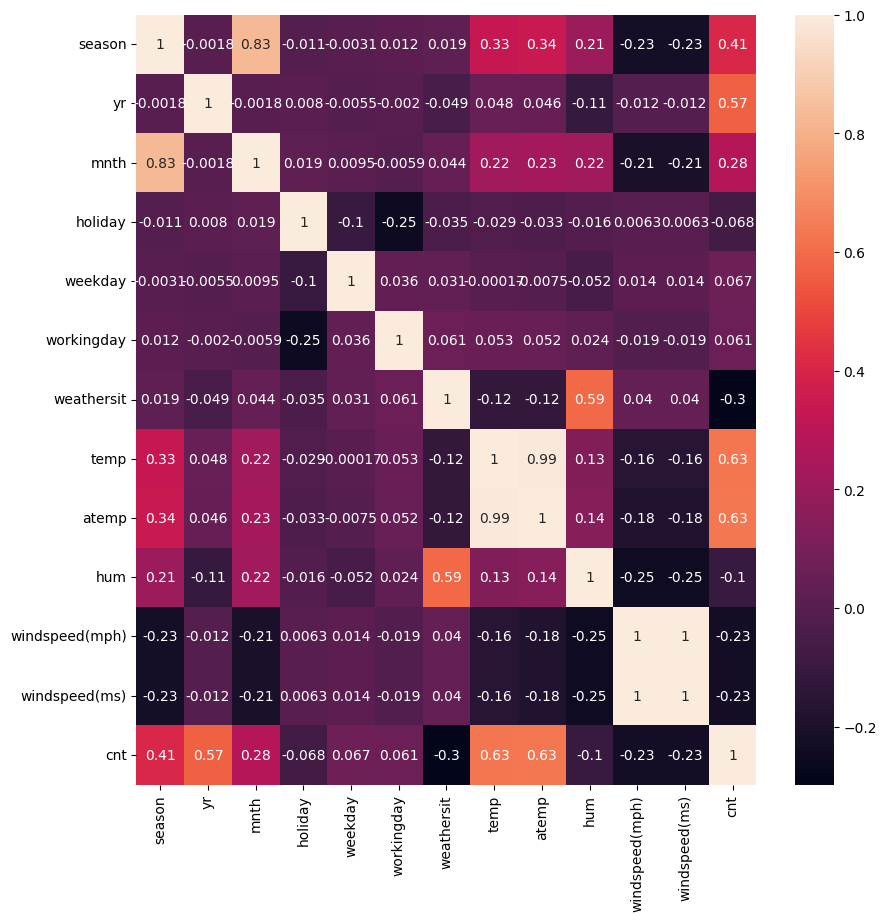

In [25]:
correlation_matrix = data_number.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot=True)

### Проведите предобработку данных

#### Удалите дубликаты, если они есть

#### Удалите выбросы, если они есть

#### Если есть необходимость, то удалите  признаки

In [33]:
data = data.drop(["windspeed(mph)", "atemp"], axis=1)

#### Обновите индексы, если было удаление строк

In [34]:
data.reset_index(drop=True, inplace=True)

#### В двух копиях данных сделайте два варианта приведения признаков к одному масштабу: нормализация (MinMaxScaller), стандартизация (StandartScaller)

#### MinMaxScaler

In [35]:
X = data.drop('cnt', axis=1)
y = data['cnt']

scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)

X_mm_df = pd.DataFrame(X_mm, columns=X.columns)
X_mm_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms)
0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.828620,0.284606
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.715771,0.466215
2,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.449638,0.465740
3,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.607131,0.284297
4,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.449313,0.339143


#### StandardScaler

In [36]:
X = data.drop('cnt', axis=1)
y = data['cnt']

scaler = StandardScaler()
X_ss = scaler.fit_transform(X)

X_ss_df = pd.DataFrame(X_ss, columns=X.columns)
X_ss_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms)
0,-1.348213,-1.001369,-1.600161,-0.171981,1.498809,-1.471225,1.110427,-0.826662,1.250171,-0.387892
1,-1.348213,-1.001369,-1.600161,-0.171981,-1.496077,-1.471225,1.110427,-0.721095,0.479113,0.749602
2,-1.348213,-1.001369,-1.600161,-0.171981,-0.996930,0.679706,-0.726048,-1.634657,-1.339274,0.746632
3,-1.348213,-1.001369,-1.600161,-0.171981,-0.497782,0.679706,-0.726048,-1.614780,-0.263182,-0.389829
4,-1.348213,-1.001369,-1.600161,-0.171981,0.001366,0.679706,-0.726048,-1.467414,-1.341494,-0.046307


## Решите задачу регрессии разными способами

### Сначала для двух копий из предыдущего задания проведите линейную регрессию. Оцените качество с помощью r2 метрики. На том наборе, который показал лучшие результаты проводите дальнейшие исследования

#### Линейная регрессия

In [37]:
X_train_mm, X_test_mm, y_train, y_test = train_test_split(X_mm, y, test_size=0.2, random_state=47)
X_train_ss, X_test_ss, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=47)

In [38]:
LR1_mm = LinearRegression()
LR1_mm.fit(X_train_mm, y_train)
y_pred_mm = LR1_mm.predict(X_test_mm)

LR1_mm.coef_

array([ 1449.69117841,  2022.33722214,  -375.08885683,  -557.9871423 ,
         449.562634  ,   106.99932282, -1114.78980768,  4223.20656826,
        -998.41151734, -1371.3509758 ])

In [39]:
print(LR1_mm.score(X_test_mm, y_test))
print(r2_score(y_test, y_pred_mm))
print(mean_squared_error(y_test, y_pred_mm))

0.8072463021614437
0.8072463021614437
742660.2352238701


In [40]:
LR1_ss = LinearRegression()
LR1_ss.fit(X_train_ss, y_train)
y_pred_ss = LR1_ss.predict(X_test_ss)

LR1_ss.coef_

array([ 536.40847045, 1011.16766492, -117.62619089,  -93.20637902,
        150.11010129,   49.74559666, -303.51351452,  962.61431298,
       -146.12395859, -218.94526221])

In [41]:
print(r2_score(y_test, y_pred_ss))
print(mean_squared_error(y_test, y_pred_ss))

0.8072463021614437
742660.23522387


In [42]:
result = {'LR1':[r2_score(y_test, y_pred_mm), mean_squared_error(y_test, y_pred_mm)]}

### Решите задачу с помощью лассо, ридж, elasticnet регрессии. Оцените их качество

In [43]:
reg_lasso = Lasso(alpha=0.5)
reg_lasso.fit(X_train_mm, y_train)
y_pred_lasso = reg_lasso.predict(X_test_mm)
print(reg_lasso.coef_)
result ['Lasso']=[r2_score(y_test, y_pred_lasso), mean_squared_error(y_test, y_pred_lasso)]
print(r2_score(y_test, y_pred_lasso))
print(mean_squared_error(y_test, y_pred_lasso))

[ 1433.25802249  2021.20586538  -353.92080424  -543.8880838
   446.48436044   106.27586537 -1123.24806766  4215.6030962
  -958.16760271 -1344.96589474]
0.8072038046547636
742823.9737599468


In [44]:
reg_ridge = Ridge(alpha=0.5)
reg_ridge.fit(X_train_mm, y_train)
y_pred_ridge = reg_ridge.predict(X_test_mm)

print(reg_ridge.coef_)

result['Ridge'] = [r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge)]
print(r2_score(y_test, y_pred_ridge))
print(mean_squared_error(y_test, y_pred_ridge))

[ 1441.98027781  2018.43917278  -354.65449832  -544.13595754
   448.04371892   109.65402048 -1139.4108348   4149.5530418
  -910.77880762 -1319.89413114]
0.8075569260599301
741463.4331904827


In [45]:
reg_elasticnet = ElasticNet(alpha=0.5)
reg_elasticnet.fit(X_train_mm, y_train)
y_pred_elasticnet = reg_elasticnet.predict(X_test_mm)

print(reg_elasticnet.coef_)

result['Elasticnet'] = [r2_score(y_test, y_pred_elasticnet), mean_squared_error(y_test, y_pred_elasticnet)]
print(r2_score(y_test, y_pred_elasticnet))
print(mean_squared_error(y_test, y_pred_elasticnet))

[ 635.97575672 1056.09174973  277.36328341  -75.94443776  134.33461538
  111.40426049 -400.00032795  818.55441846  -76.74314788 -204.4488958 ]
0.4754745823609916
2020942.6559014863


### Решите задачу с помощью полиномиальной регрессии с коэффициентом полинома 2 и 3. Оцените качество

In [46]:
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train_mm)
X_poly_test = poly_features.fit_transform(X_test_mm)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_pred_poly = poly_model.predict(X_poly_test)

In [47]:
result ['Polynomial2']=[r2_score(y_test, y_pred_poly), mean_squared_error(y_test, y_pred_poly)]
print(r2_score(y_test, y_pred_poly))
print(mean_squared_error(y_test, y_pred_poly))

0.8252118946800365
673440.6492163973
